In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Alternative Fuel Vehicles

In [33]:
df1= pd.read_csv("../Datasets/Alternative Fuel Vehicles US.csv")
pd.set_option('display.max_columns', None)
df1.sample(5)

,Unnamed: 0,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
481,481,Sedan/Wagon,ES 300h,2021.0,Lexus,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,43.0,44.0,44.0,Auto,NaN,SI,2.5L,4.0,NaN,NaN,NaN,NaN
735,735,Street Sweeper,M4 Hybrid,NaN,Global,Diesel/Hybrid Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Global,NaN,NaN,NaN,NaN,Cummins ISB6.7,NaN,NaN
567,567,Sedan/Wagon,Camry Hybrid SE/XLE/XSE,2021.0,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,44.0,47.0,46.0,Auto,NaN,SI,2.5L,4.0,NaN,NaN,NaN,NaN
338,338,SUV,Q5,2021.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,23.0,28.0,25.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,NaN
319,319,SUV,XC90 T8 AWD Recharge ext. Range,2022.0,Volvo,Plug-in Hybrid Electric,36.0,530.0,NaN,NaN,66.0,25.0,27.0,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


### Se eliminan columnas inncesarias

In [34]:
df1 = df1.drop(columns={'Transmission Type', 'Transmission Make', 'Number of Passengers','Engine Type', 'Engine Size', 'Engine Cylinder Count',
                        'Heavy-Duty Power System', 'Notes', 'Drivetrain'})

Se normalizan los nombres de cada columna

In [35]:
df1.columns

Index(['Unnamed: 0', 'Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined'],
      dtype='object')

Renombramos columnas

In [36]:
df1.rename(columns={'Category':'category', 'Model': 'model', 'Model Year':'model_year', 'Manufacturer':'manufacturer'
    , 'Fuel': 'fuel','All-Electric Range': 'all_electric_range', 'PHEV Total Range':'PHEV_total_range',
       'Alternative Fuel Economy City': 'alternative_fuel_economy_city', 'Alternative Fuel Economy Highway':'alternative_fuel_economy_highway',
       'Alternative Fuel Economy Combined': 'alternative_fuel_economy_combined', 'Conventional Fuel Economy City': 'conventional_fuel_economy_city',
       'Conventional Fuel Economy Highway': 'conventional_fuel_economy_highway',
       'Conventional Fuel Economy Combined': 'conventional_fuel_economy_combined'
    }, inplace = True)

### Se verifica el tipo de dato de cada columna

In [37]:
df1.shape, df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          882 non-null    int64  
 1   category                            882 non-null    object 
 2   model                               882 non-null    object 
 3   model_year                          594 non-null    float64
 4   manufacturer                        882 non-null    object 
 5   fuel                                882 non-null    object 
 6   all_electric_range                  222 non-null    float64
 7   PHEV_total_range                    43 non-null     float64
 8   alternative_fuel_economy_city       169 non-null    float64
 9   alternative_fuel_economy_highway    169 non-null    float64
 10  alternative_fuel_economy_combined   262 non-null    float64
 11  conventional_fuel_economy_city      444 non-n

((882, 14), None)

Tenemos 882 filas y 13 columnas

Se modifica el tipo de dato de 'Model Year' a entero

In [38]:
df1['model_year'] = df1['model_year'].astype('Int64')

In [39]:
df1.columns

Index(['Unnamed: 0', 'category', 'model', 'model_year', 'manufacturer', 'fuel',
       'all_electric_range', 'PHEV_total_range',
       'alternative_fuel_economy_city', 'alternative_fuel_economy_highway',
       'alternative_fuel_economy_combined', 'conventional_fuel_economy_city',
       'conventional_fuel_economy_highway',
       'conventional_fuel_economy_combined'],
      dtype='object')

Validamos si hay valores nulos

In [40]:
df1.isna().sum()

Unnamed: 0                              0
category                                0
model                                   0
model_year                            288
manufacturer                            0
fuel                                    0
all_electric_range                    660
PHEV_total_range                      839
alternative_fuel_economy_city         713
alternative_fuel_economy_highway      713
alternative_fuel_economy_combined     620
conventional_fuel_economy_city        438
conventional_fuel_economy_highway     438
conventional_fuel_economy_combined    438
dtype: int64

Hay valores nulos pero se opta por noi borrarlos ya que me afectaria otras columnas que si tienen valor para el analisis

validamos valores duplicados

In [41]:
df1.duplicated().value_counts()

False    882
Name: count, dtype: int64

hay 2  valores duplicados, se eliminan

In [42]:
df1.drop_duplicates(inplace= True)

### Analisis Descriptivo

In [43]:
df1.describe()

,Unnamed: 0,model_year,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
count,882.000000,594.0,222.000000,43.000000,169.000000,169.000000,262.000000,444.000000,444.000000,444.000000
mean,440.500000,2021.538721,165.927928,450.465116,84.585799,77.591716,75.992366,25.900901,30.085586,27.261261
std,254.755765,0.498919,132.992955,93.042578,39.430696,32.735123,32.303279,10.860665,12.815653,9.803912
min,0.000000,2021.0,8.000000,290.000000,10.000000,12.000000,11.000000,13.000000,16.000000,15.000000
25%,220.250000,2021.0,23.000000,380.000000,71.000000,66.000000,56.000000,19.000000,24.000000,21.000000
50%,440.500000,2022.0,203.000000,460.000000,94.000000,85.000000,76.000000,22.000000,28.000000,24.000000
75%,660.750000,2022.0,260.000000,520.000000,115.000000,99.000000,101.000000,28.000000,33.000000,30.000000
max,881.000000,2022.0,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000


Se quiere conformar un dataset con las categorias de vehiculos que pueden ser utilizados en la flota y su rendimiento.

* La media de autonomia de un vehiculo 100% electrico es de 166 millas.
* La media de autonomia de un vehiculo hibrido enchufable es de 450 millas. 
* La media de autonomia de un vehiculo convencional de combustible es de 443 millas. 

Verificamos que categorias pueden ser usadas en el modelo de negocio

In [44]:
df1['category'].value_counts()

category
Sedan/Wagon                      283
SUV                              222
Pickup                            79
Transit Bus                       77
Vocational/Cab Chassis            68
Passenger Van/Shuttle Bus         46
Van                               23
Street Sweeper                    21
School Bus                        21
Refuse                            16
Tractor                           15
Step Van                           5
TractorVocational/Cab Chassis      4
Vocational/Cab ChassisVan          1
Vocational/Cab ChassisTractor      1
Name: count, dtype: int64

Por tamaño de cantidad de pasajeros solo las categorias : 'Sedan' y 'Suv' son operativas para el negocio
creamos el nuevo dataset

In [45]:
df_categorias = df1.loc[df1['category'].isin(['Sedan/Wagon', 'SUV'])]
df_categorias.head()

,Unnamed: 0,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
0,0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0
1,1,Sedan/Wagon,A3,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0
2,2,Sedan/Wagon,A3 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0
3,3,Sedan/Wagon,A4 allroad quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0
4,4,Sedan/Wagon,A4 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0


In [46]:
df_categorias['fuel'].value_counts()

fuel
Hybrid Electric            255
Electric                   125
Plug-in Hybrid Electric     91
Biodiesel (B20)             22
Hydrogen Fuel Cell          10
Ethanol (E85)                2
Name: count, dtype: int64

Grafico de barras 'Rendimiento en millas por categoria de vehículo'

Text(0.5, 0, 'Categoria')

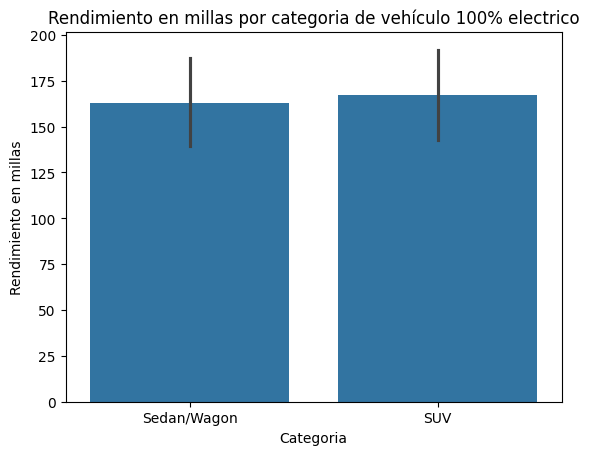

In [47]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['all_electric_range'])
plt.title('Rendimiento en millas por categoria de vehículo 100% electrico')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')



Se observa que un Sedan o suv 100% electrico tiene autonomia casi igual

Text(0.5, 0, 'Categoria')

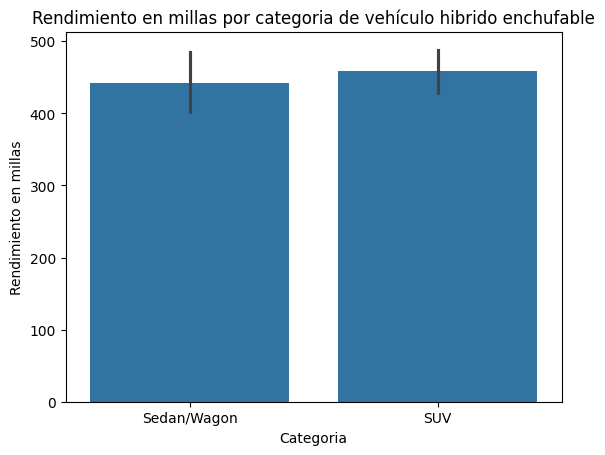

In [48]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['PHEV_total_range'])
plt.title('Rendimiento en millas por categoria de vehículo hibrido enchufable')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

Ambas categorias tienen una autonomia aproximada de 450 millas

Text(0.5, 0, 'Categoria')

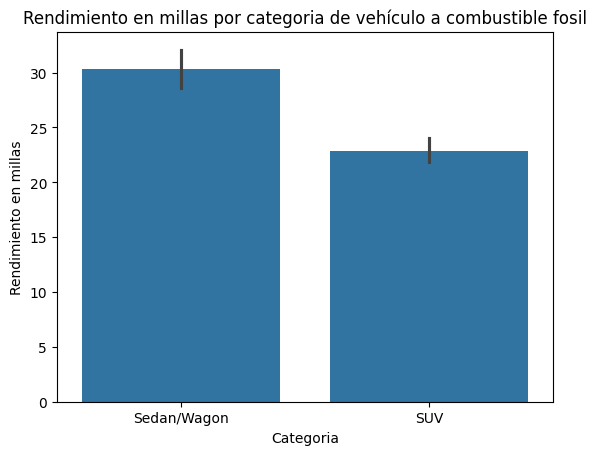

In [49]:
	
sns.barplot(x = df_categorias['category'] , y = df_categorias['conventional_fuel_economy_city'])
plt.title('Rendimiento en millas por categoria de vehículo a combustible fosil')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

El sedan tiene mejor autonomia obviamente por caracteristicas particulares.

### Se calcula el gasto en dolares americanos de cada opcion de vehiculo para determinar si hay mucha diferencia

Carro hibrido

In [50]:
# Automia de 450 km
galones = 13.2
valor_galon = 4.05
cant_kwatts = 20
valor_kwatts = 0.15
gasto_hev = galones* valor_galon + cant_kwatts * valor_kwatts
gasto_hev

56.459999999999994

Carro 100 % electrico

In [51]:
# Automia de 450 km

gasto_ev = valor_kwatts * 450
gasto_ev

67.5

Carro convencional a combustible

In [52]:
# para recorrer 450 millas es necesario 15 galones
gasto_conv = valor_galon * 15
gasto_conv

60.75

Se esporta el dataset Procesado  la carpeta Datasets_procesados

In [53]:
df1.to_csv("../Datasets_procesados/Alternative Fuel Vehicles US.csv")